In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.
C:\Users\zheng\anaconda3\envs\env_cv\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zheng\anaconda3\envs\env_cv\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zheng\anaconda3\envs\env_cv\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zheng\anaconda3\envs\env_cv\lib\sit

In [30]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation,Conv2D,MaxPooling2D

In [31]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [32]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [33]:
print(Y_test.shape)

(10000,)


4


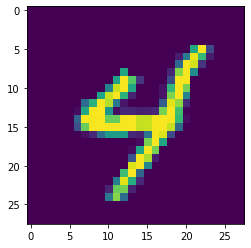

In [34]:
plt.imshow(X_train[115,:,:])
print(Y_train[115])

In [35]:
X_train = X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [36]:
print(X_train.shape)

(60000, 28, 28, 1)


In [37]:
print(np.max(X_train))
print(np.min(X_train))

255
0


In [38]:
X_train=X_train/255
X_test=X_test/255

In [39]:
print(np.max(X_train))
print(np.min(X_train))

1.0
0.0


In [40]:
Y_train=keras.utils.to_categorical(Y_train,10)
Y_test=keras.utils.to_categorical(Y_test,10)
print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


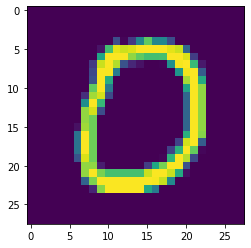

In [41]:
plt.imshow(X_test[10,:,:,:])
print(Y_test[10,:])

In [44]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(200))
model.add(Activation("relu"))
model.add(Dense(200))
model.add(Activation("relu"))
model.add(Dense(10,activation="softmax"))


In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_19 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_21 (Activation)   (None, 10, 10, 64)        0         
__________

In [48]:
adam=keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-08)
model.compile(loss="categorical_crossentropy",optimizer=adam,metrics=["accuracy"])

In [50]:
model.fit(X_train,Y_train,batch_size=100,epochs=1,verbose=1,validation_data=[X_test,Y_test])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 58s 964us/step - loss: 0.1609 - acc: 0.9505 - val_loss: 0.0449 - val_acc: 0.9854


predicted output: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
the label is:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


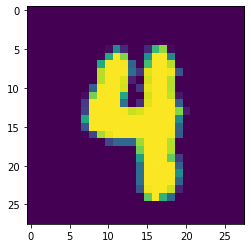

In [56]:
test_index=250
plt.imshow(X_test[test_index,:,:,0])
output=model.predict(X_test[test_index,:,:,:].reshape(1,28,28,1))
print("predicted output:",np.round(output))
print("the label is: ",Y_test[test_index])

In [63]:
model.save("model/ALexnet_mnist.h5")

In [ ]:
#预先训练好的模型的读取
from keras.models import load_model
model=load_model("model/ALexnet_mnist.h5")
model.summary()